# Trabajo computacional N° 1

Materia: Introducción a Redes Complejas en Biología de Sistemas

Autores: Federico, Lucas Alonso, Francisco, Emanuel Chironi

## Ejercicio 1

### Ítem a

Las tres redes se comparan en la Fig. 1. La primera es la red correspondiente al método Y2H. La segunda corresponde a un método a determinar (AP-SM), mientras que la tercera red corresponde a interacciones reportadas en la literatura.

                                               (a) Red Yeast Y2H


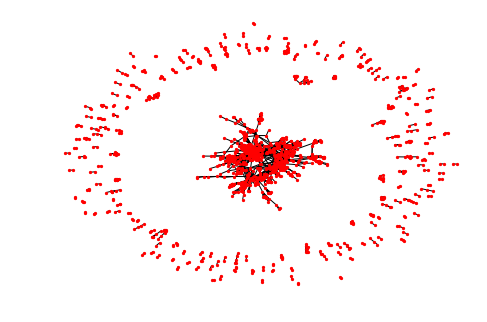

                                              (b) Red Yeast AP-MS


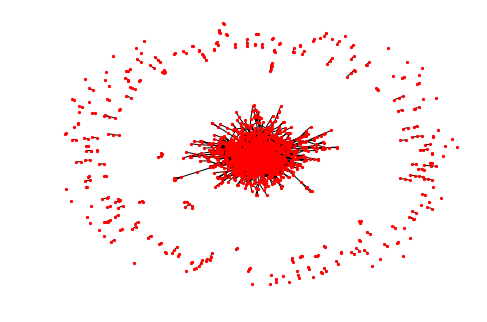

                                            (c) Red Yeast Literatura


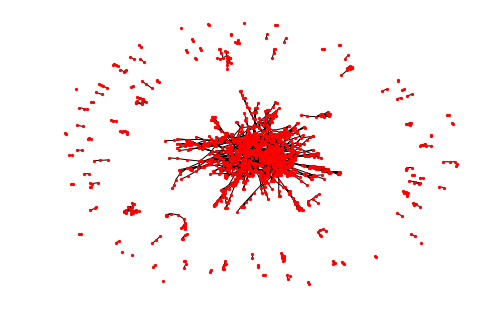

In [17]:
import matplotlib.pylab as plt
import networkx as nx
import numpy as np

def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

a = ldata("yeast_AP-MS.txt")

print("                                               (a) Red Yeast Y2H")
G = nx.Graph()
G.add_edges_from(a)
nx.draw(G, node_size=5)
plt.show()

b = ldata("yeast_Y2H.txt")

print("                                              (b) Red Yeast AP-MS")
H = nx.Graph()
H.add_edges_from(b)
nx.draw(H, node_size=5)
plt.show()

c = ldata("yeast_LIT.txt")

print("                                            (c) Red Yeast Literatura")
I = nx.Graph()
I.add_edges_from(c)
nx.draw(I, node_size=5)
plt.show()

# Ítem b

La Tabla 1 resume las características solicitadas respecto de las redes graficadas en el ítem anterior.

<table>
   <tr>  <th>Parámetro </th> <th>Red Yeast - Y2H</th>  <th>Red Yeast - AP-MS</th>  <th>Red Yeast - Liter.</th>  </tr>
   <tr> <th>N</th> <td>1622</td> <td>2018</td> <td>1536</td> </tr>
   <tr> <th>L</th> <td>9070</td> <td>2930</td> <td>2925</td> </tr>
   <tr> <th>Tipo</th> <td>No dirigida</td> <td>No dirigida</td> <td>No dirigida</td> </tr>
   <tr>  <th>k_mean</th> <td>11.18</td> <td>2.90</td> <td>3.81</td> </tr> 
   <tr> <th>k_max</th> <td>127</td> <td>91</td> <td>40</td> </tr>
   <tr> <th>k_min</th><td>1</td><td>1</td><td>1</td> </tr>
   <tr> <th>Densidad</th><td>0.0069</td><td>0.0014</td><td>0.0025</td> </tr>
   <tr>  <th>C_local</th> <td>0.55</td> <td>0.046</td> <td>0.29</td> </tr>
   <tr>  <th>C_global</th> <td>0.62</td> <td>0.023</td> <td>0.35</td> </tr>
   <tr> <th>Diámetro</th> <td>15</td> <td>14</td> <td>19</td> </tr> 
</table>

Tabla 1

El estudio del tipo de red merece una aclaración. La determinación se realizó a través de la matriz de adyacencia. La idea es que, cuando la red es no dirigida, la matriz de adyacencia es simétrica. En tal caso, la resta entre la matriz y su transpuesta es la matriz nula, cuyos coeficientes suman cero. Esto nos permitió concluir que las tres redes de nuestro problema eran no dirigidas.

#### i. Cálculo del número de nodos

In [20]:
an=G.number_of_nodes()
bn=H.number_of_nodes()
cn=I.number_of_nodes()
print("numero de nodos de la red Y2H    = "+str(an))
print("numero de nodos de la red AP-SM  = "+str(bn))
print("numero de nodos de la red Liter. = "+str(cn))

numero de nodos de la red Y2H    = 1622
numero de nodos de la red AP-SM  = 2018
numero de nodos de la red Liter. = 1536


#### ii. Cálculo del número de enlaces

In [27]:
print("numero de enlaces de la red Y2H    = "+str(G.number_of_edges()))
print("numero de enlaces de la red AP-SM  = "+str(H.number_of_edges()))
print("numero de enlaces de la red Liter. = "+str(I.number_of_edges()))

numero de enlaces de la red Y2H    = 9070
numero de enlaces de la red AP-SM  = 2930
numero de enlaces de la red Liter. = 2925


#### iii. Análisis del tipo de red

In [30]:
import pandas as pd
import numpy as np
A = nx.to_pandas_adjacency(G)
B=A.transpose()
AN=A.values #convierte pandas a numpy
BN=B.values 
print(np.sum(AN-BN)) 

#es simetrica. la red no es dirigida

A = nx.to_pandas_adjacency(H)
B=A.transpose()
AN=A.values #convierte pandas a numpy
BN=B.values 
print(np.sum(AN-BN))

#es simetrica. la red no es dirigida

A = nx.to_pandas_adjacency(I)
B=A.transpose()
AN=A.values #convierte pandas a numpy
BN=B.values 
print(np.sum(AN-BN))

#es simetrica. la red no es dirigida
print()
print("Dado que las matrices son simétricas, los enlaces entre nodos corresponden a una red no-dirigida")

0.0
0.0
0.0

Dado que las matrices son simétricas, los enlaces entre nodos corresponden a una red no-dirigida


#### iv: Cálculo del grado medio de la red

In [40]:
#### Red de Y2H

grados_G = [gra for (nom,gra) in G.degree()] # [lo_que_quiero  for los_elementos in iterable]

grados_media=np.mean(np.asarray(grados_G))
grados_max=np.max(np.asarray(grados_G))
grados_min=np.min(np.asarray(grados_G))

print('')
print('Datos de la red Y2H')
print('')
print(' <k>  = '+str(grados_media))
print('k_max = '+str(grados_max))
print('k_min = '+str(grados_min))





#### Red de AP-SM

grados_G = [gra for (nom,gra) in H.degree()] # [lo_que_quiero  for los_elementos in iterable]

grados_media=np.mean(np.asarray(grados_H))
grados_max=np.max(np.asarray(grados_H))
grados_min=np.min(np.asarray(grados_H))

print('')
print('Datos de la red AP-SM')
print('')
print(' <k>  = '+str(grados_media))
print('k_max = '+str(grados_max))
print('k_min = '+str(grados_min))





#### Red de Literatura

grados_I = [gra for (nom,gra) in I.degree()] # [lo_que_quiero  for los_elementos in iterable]

grados_media=np.mean(np.asarray(grados_I))
grados_max=np.max(np.asarray(grados_I))
grados_min=np.min(np.asarray(grados_I))

print('')
print('Datos de la red Literatura')
print('')
print(' <k>  = '+str(grados_media))
print('k_max = '+str(grados_max))
print('k_min = '+str(grados_min))


Datos de la red Y2H

 <k>  = 11.183723797780518
k_max = 127
k_min = 1

Datos de la red AP-SM

 <k>  = 2.9038652130822595
k_max = 91
k_min = 1

Datos de la red Literatura

 <k>  = 3.80859375
k_max = 40
k_min = 1


#### v. Cálculo de densidades

In [42]:
#### Red Y2H

e=G.number_of_edges()
N=G.number_of_nodes()
densidad=2*e/(N*(N-1))
print('Densidad de la red Y2H    = '+str(densidad))

#### Red AP-SM

e=H.number_of_edges()
N=H.number_of_nodes()
densidad=2*e/(N*(N-1))
print('Densidad de la red Ap-SM  = '+str(densidad))

#### Red Liter.

e=I.number_of_edges()
N=I.number_of_nodes()
densidad=2*e/(N*(N-1))
print('Densidad de la red Liter. = '+str(densidad))

Densidad de la red Y2H    = 0.006899274397150227
Densidad de la red Ap-SM  = 0.0014396951973635397
Densidad de la red Liter. = 0.002481168566775244


#### vi. Cálculo de coeficientes de Clustering

In [45]:
#### Cálculos para la red Y2H

av=nx.average_clustering(G)
tr=nx.transitivity(G)

print()
print('Coeficientes para la red Y2H')
print()
print('<C_local>  = '+str(av))
print('<C_global> = '+str(tr))

#### Cálculos par la red AP-SM

av=nx.average_clustering(H)
tr=nx.transitivity(H)

print()
print('Coeficientes para la red AP-MS')
print()
print('<C_local>  = '+str(av))
print('<C_global> = '+str(tr))

#### Cálculos para la red Literatura

av=nx.average_clustering(I)
tr=nx.transitivity(I)

print()
print('Coeficientes para la red Literatura')
print()
print('<C_local>  = '+str(av))
print('<C_global> = '+str(tr))


Coeficientes para la red Y2H

<C_local>  = 0.5546360657013013
<C_global> = 0.6185901626483971

Coeficientes para la red AP-MS

<C_local>  = 0.046194001297365166
<C_global> = 0.02361415364051535

Coeficientes para la red Literatura

<C_local>  = 0.2924923005815711
<C_global> = 0.3461926495315878


#### vii. Cálculo del diámetro de la red

In [94]:
#### Red de Y2H

largest_cc = max(nx.connected_components(G), key=len)
type(largest_cc)       
GG = []

for line in a:
    if line[0] in largest_cc or line[1] in largest_cc: 
        GG.append(line)

J = nx.Graph()
J.add_edges_from(GG)   
diamG=nx.diameter(J)
print('Diámetro de la red Y2H: ' +str(diamG))

#### Red de AP-MS

largest_cc = max(nx.connected_components(H), key=len)     
GH = []

for line in b:
    if line[0] in largest_cc or line[1] in largest_cc: 
        GH.append(line)

K = nx.Graph()
K.add_edges_from(GH)   
diamH=nx.diameter(K)
print('Diámetro de la red AP-MS: ' +str(diamH))

#### Red de Literatura

largest_cc = max(nx.connected_components(I), key=len)    
GI = []

for line in c:
    if line[0] in largest_cc or line[1] in largest_cc: 
        GI.append(line)

L = nx.Graph()
L.add_edges_from(GI)   
diamI=nx.diameter(L)
print('Diámetro de la red literatura: ' +str(diamI))

Diámetro de la red Y2H: 15
Diámetro de la red AP-MS: 14
Diámetro de la red literatura: 19


In [93]:
GG = []

for line in a:
    if line[0] in largest_cc or line[1] in largest_cc: 
        GG.append(line)

J = nx.Graph()
J.add_edges_from(GG)   

diam=nx.diameter(J)
print('Diámetro de la red Y2H: ' +str(diam))



15


In [89]:
diam=nx.diameter(J)
print(diam)

15


### Ítem c

La información sugiere que AP-MS es el modelo radial en el cual las demás proteinas del complejo se linkean con la principal. Eso explicaría por qué la cantidad de enlaces es menor que la real y que sea tan baja la densidad y el coeficiente de clustering. Además, el otro modelo posible es un límite superior para la cantidad de interacciones que los distintos modelos pueden tener, de modo que debería ser mayor o igual que el caso Y2H.

### Ítem d

A partir de las interacciones encontradas se puede construir el siguiente diagrama de Venn

## Ejercicio 2

### Ítem a

Dibujamos las redes de delfines de distintas maneras

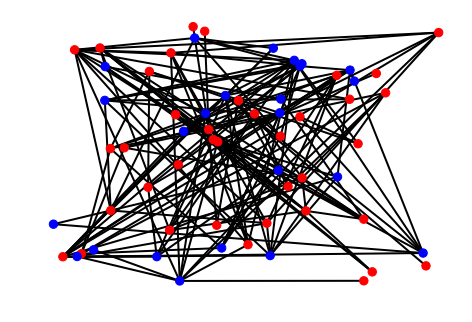

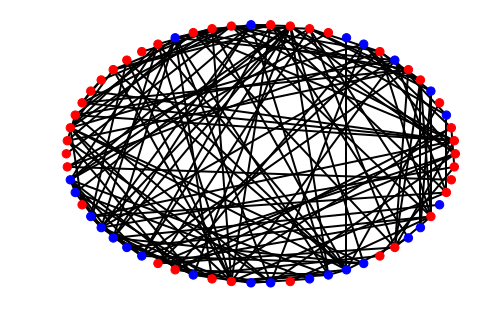

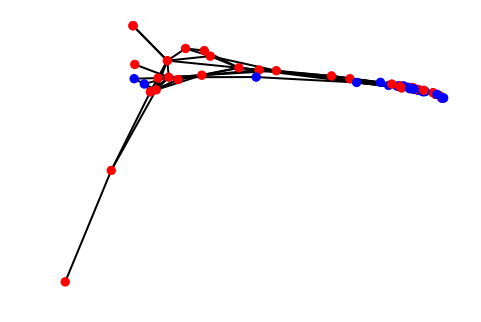

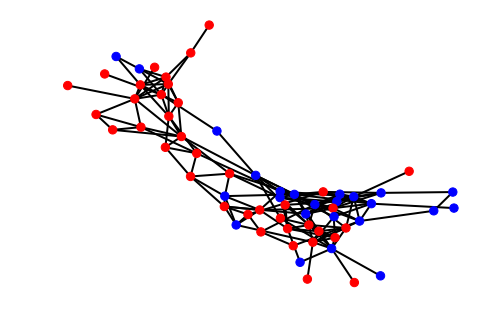

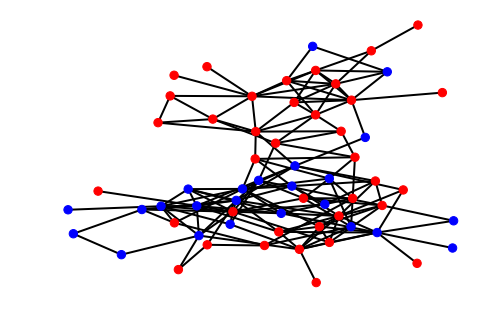

cantidad de delfines machos: 34
cantidad de delfines hembras: 24
cantidad total de delfines: 62
Cantidad de enlaces diferentes: 63
Cantidad total de enlaces: 159


In [7]:
# Cargamos los archivos de datos sobre los delfines, tanto la red como la información de género de los delfines.

import matplotlib.pylab as plt
import networkx as nx
import numpy as np
import pandas as pd

G = nx.read_gml('dolphins.gml')

def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

a = ldata('dolphinsGender.txt')

# Ahora vamos a incorporar el dato de género al objeto que contiene la red

for dolph in a:
    G.nodes[dolph[0]]['Gender'] = dolph[1]
    
# Luego tenemos que graficar las redes para diferentes layouts. De estos me parece que el más apropiado es el cuarto, porque
# muestra mejor la segregación de los delfines por género.

options = {
     'node_color':["blue" if Gender=="f" else "red" for Gender in nx.get_node_attributes(G, "Gender").values()],
     'node_size': 70,
     'width': 2,
}
nx.draw_random(G, **options)
plt.show()
nx.draw_circular(G, **options)
plt.show()
nx.draw_spectral(G, **options)
plt.show()
nx.draw_spring(G, **options)
plt.show()
nx.draw_kamada_kawai(G, **options)
plt.show()

# Acá estamos sacando la cuenta de cuántos delfines de cada género existen. La diferencia de 4 delfines entre el total y
# la suma de los generos se debe a los cuatro delfines que no tienen un género asignado.

counter_m = 0
counter_f = 0

for line in a:
    if line[1] == 'm':
        counter_m = counter_m +1
    else: 
        if line[1] == 'f':
            counter_f = counter_f +1

print('cantidad de delfines machos: '+str(counter_m))
print('cantidad de delfines hembras: '+str(counter_f))
print('cantidad total de delfines: '+str(len(a)))

# A continuación vamos a determinar cuántos enlaces de tipo inter-género existen entre los delfines de la red

contad_diff = 0
c = dict(G.edges)

for line in c:
    if G.nodes[line[1]] != G.nodes[line[0]]:
        G.edges[line[0],line[1]]['T_enl'] = 'diff'
        contad_diff= contad_diff +1
    else:
        G.edges[line[0],line[1]]['T_enl'] = 'eq'
        
print('Cantidad de enlaces diferentes: '+str(contad_diff))
print('Cantidad total de enlaces: '+str(len(c)))


### La mejor manera de ver esta red parece ser la 4ta, donde se aprecia la homofilia

### Ítem b

Veamos si es cierto que hay homofilia

#### i. Distribución nula 

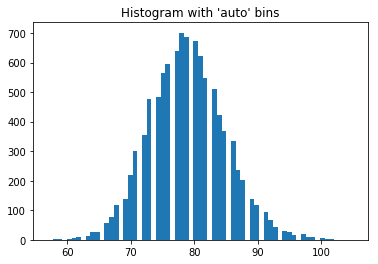

In [10]:
 # Vamos a definir una función que asigna el género al azar y luego calcula la cantidad de enlaces intergénero que quedan 
# formados. El resultado que devuelve es la cantidad de enlaces.

import random

def GeneroAzar(a):
    b = a
    for num in b:
        num[1]='f'
    indices_m = random.sample(range(62), 34)
    for num in indices_m:
        b[num][1] = 'm'
       
    for dolph in b:
        G.nodes[dolph[0]]['Gender'] = dolph[1]
    
    contad_diff = 0
    c = dict(G.edges)
    for line in c:
        if G.nodes[line[1]] == G.nodes[line[0]]:
            G.edges[line[0],line[1]]['T_enl'] = 'diff'
            contad_diff= contad_diff +1
        else:
            G.edges[line[0],line[1]]['T_enl'] = 'eq'
    return contad_diff

# Crearemos una lista de 36 índices a los cuáles se les asignará el género 'masculino'. Esos números se elegirán al azar de
# entre el total de delfines.

# Hacemos las mil iteraciones para crear las redes con distribución azarosa de enlaces intergénero

Dist_interg = []
for x in range(0,10000):
    dis = GeneroAzar(a)
    Dist_interg.append(dis)
    
plt.hist(Dist_interg, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

#### ii. Valores esperados para redes libres de homofilia

In [14]:
print('Media de la distribución: '+str(np.mean(Dist_interg)))
print('Esta es la cantidad de enlaces homofílicos esperados')
print('desviación standard de la distribución: '+str(np.std(Dist_interg)))
print('Esta es la desviación en la cantidad esperada')

Media de la distribución: 78.9397
Esta es la cantidad de enlaces homofílicos esperados
desviación standard de la distribución: 5.995253448353957
Esta es la desviación en la cantidad esperada
P-valor: 0.0066


#### iii. P-valor

In [15]:
p_v =[]
d = (Dist_interg)
for x in range(0,len(d)):
    if d[x]>=159-63:
        p_v.append(d[x])

print('P-valor: '+str(len(p_v)/len(d)))

P-valor: 0.0066


### Ítem c*
Buscamos un método para dividir la red en dos de tamaño comparable

#### Estrategia elegida: Sacar de a uno el nodo con mayor grado

Red total
Diámetro de componente gigante = 8


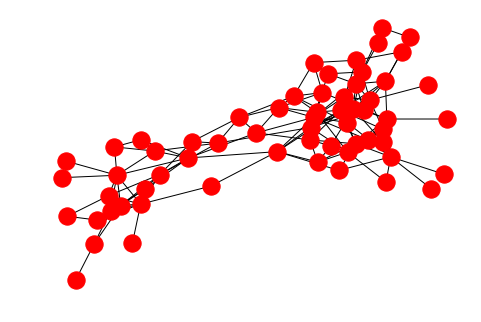

Paso N° 1
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 8   0


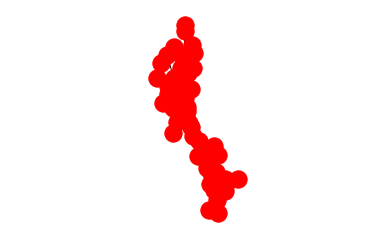

Paso N° 2
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 8   0


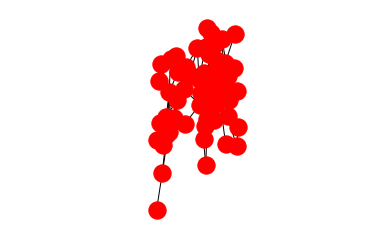

Paso N° 3
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 8   0


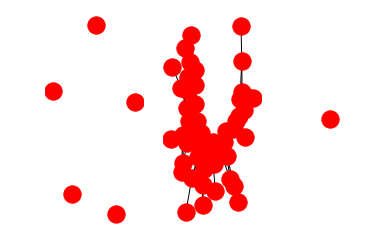

Paso N° 4
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 10   0


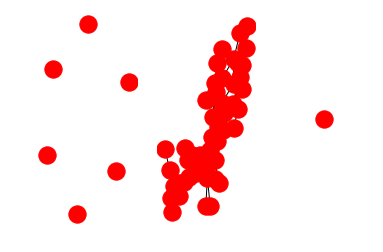

Paso N° 5
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 10   0


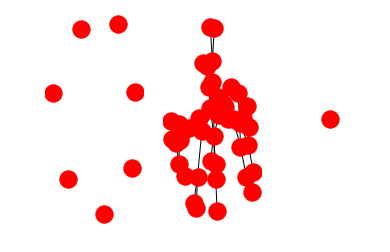

Paso N° 6
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 11   0


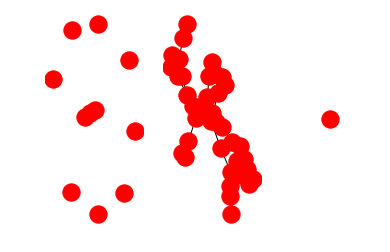

Paso N° 7
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 13   0


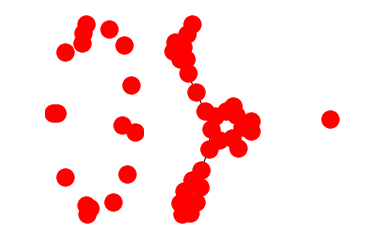

Paso N° 8
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 8   8


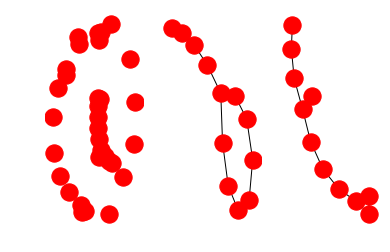

Paso N° 9
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 3   1


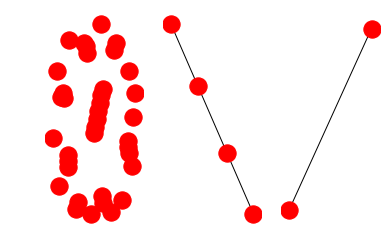

Paso N° 10
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 1   0


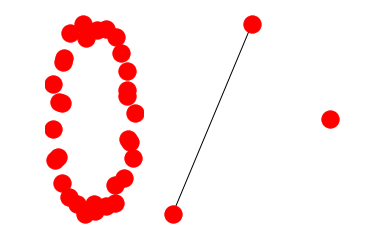

Paso N° 11
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 0   0


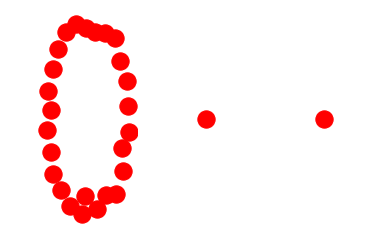

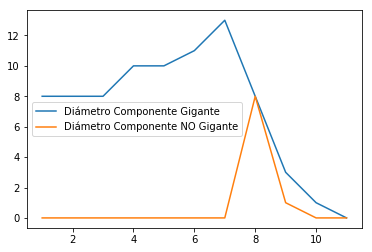

In [17]:
H=G.copy()
Componente_gigante=H.copy()

print("Red total")
print("Diámetro de componente gigante = "+str(nx.diameter(H)))
nx.draw(H)
plt.show()

paso=0
dg=[]
dng=[]
pasos=[]
while len(Componente_gigante)>1:
    paso+=1
    grados_H = [gra for (nom,gra) in H.degree()]
    Grados = np.asarray(grados_H)
    I=H.copy() #copio la red para que el iterable no cambie al remover un nodo
    for i in I.nodes(): #remuevo el nodo de mayor grado
        if H.degree[i]==np.max(Grados):
            H.remove_node(i)
    largest_cc = max(nx.connected_components(H))
    Componente_gigante=H.copy()
    Resto=H.copy()
    #Separo a la red en dos: la componente gigante y el resto
    for line in H.nodes():
        if line in largest_cc: 
            Resto.remove_node(line)
        else:
            Componente_gigante.remove_node(line)
    # Miro la componente gigante del Resto (sería la 2da componente mas grande)      
    if len(Resto)>0:
        largest_cc_2 = max(nx.connected_components(Resto))
        Componente_NO_gigante=Resto.copy()
        for line in Resto.nodes():
            if (line in largest_cc_2)==False: 
                Componente_NO_gigante.remove_node(line)
        diam_NO_gigante=nx.diameter(Componente_NO_gigante)
    else:
        diam_NO_gigante=0
        Componente_NO_gigante=nx.Graph()
    #Miro los diámetros de las dos componentes más grandes y las grafico
    diam_gigante=nx.diameter(Componente_gigante)
    print("Paso N° "+str(paso))
    print('Diámetros = '+str(diam_gigante)+'   '+str(diam_NO_gigante))
    print('Resto   Componente Gigante  Componente NO Gigante')
    plt.subplot(131)
    nx.draw(Resto)
    plt.subplot(132)
    nx.draw(Componente_gigante)
    plt.subplot(133)
    nx.draw(Componente_NO_gigante)
    plt.show()
    dg.append(diam_gigante)
    dng.append(diam_NO_gigante)
    pasos.append(paso)
#Grafico los diámetros en función del N° de paso
plt.plot(pasos,dg,label="Diámetro Componente Gigante")
plt.plot(pasos,dng,label="Diámetro Componente NO Gigante")
plt.legend()
plt.xlabel('N° de pasos')
plt.ylabel('Diámetros')
plt.show()

#### Control: Sacar de a uno un nodo al azar

Red total
Diámetro de componente gigante = 8


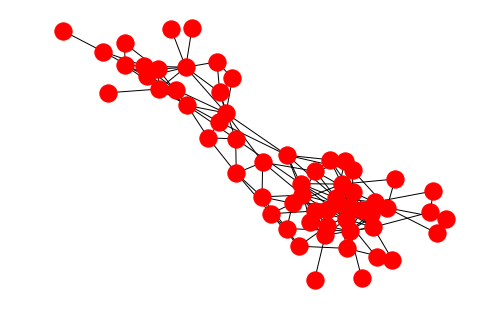

Paso N° 1
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 8   0


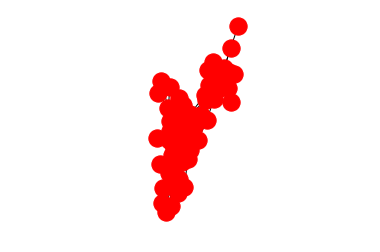

Paso N° 2
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 8   0


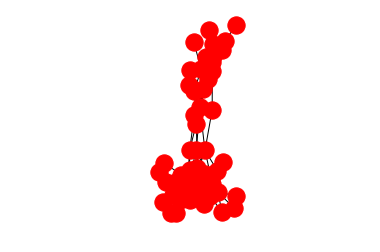

Paso N° 3
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 8   0


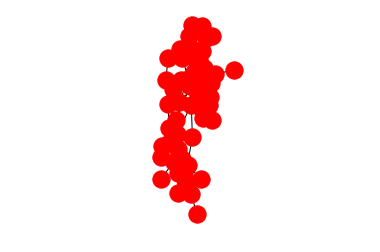

Paso N° 4
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 9   0


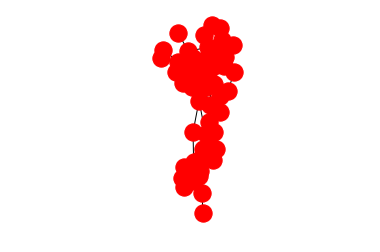

Paso N° 5
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 9   0


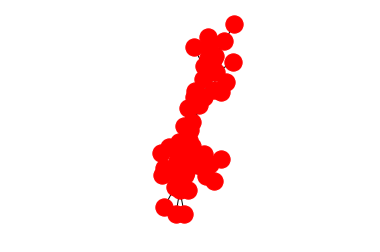

Paso N° 6
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 9   0


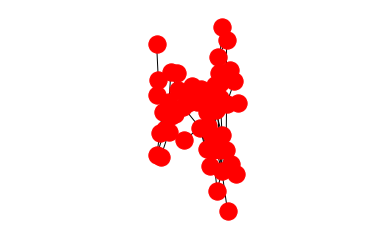

Paso N° 7
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 9   0


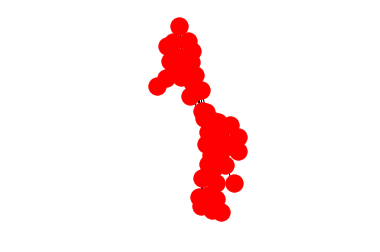

Paso N° 8
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 8   0


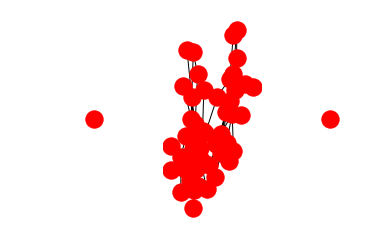

Paso N° 9
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 8   0


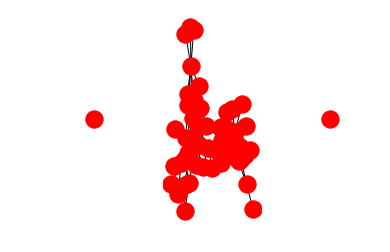

Paso N° 10
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 8   0


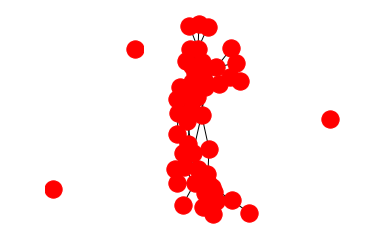

Paso N° 11
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 8   0


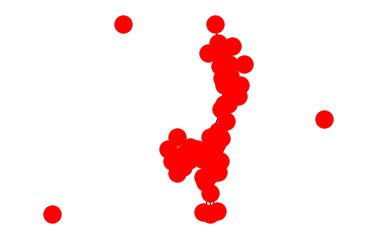

Paso N° 12
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 8   0


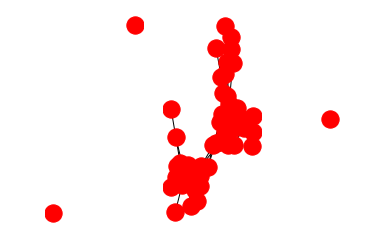

Paso N° 13
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 8   0


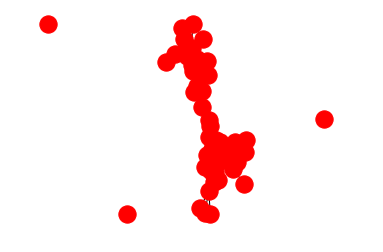

Paso N° 14
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 8   0


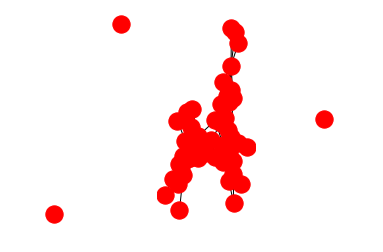

Paso N° 15
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 7   0


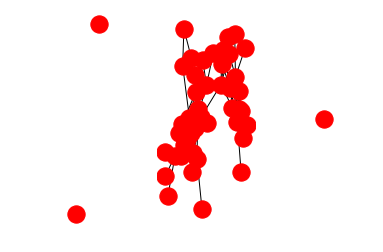

Paso N° 16
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 7   0


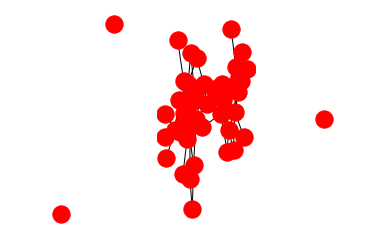

Paso N° 17
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 7   0


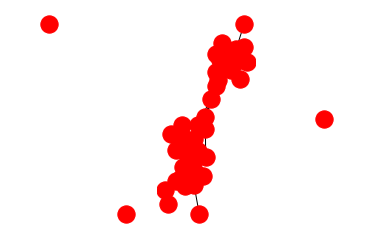

Paso N° 18
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 7   0


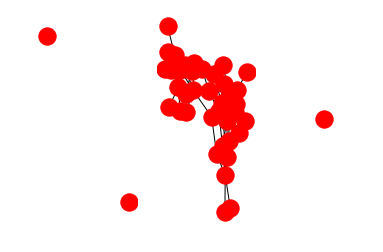

Paso N° 19
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 8   0


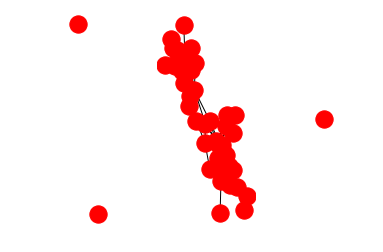

Paso N° 20
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 7   0


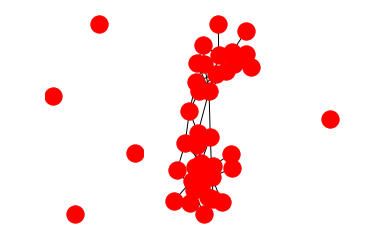

Paso N° 21
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 7   0


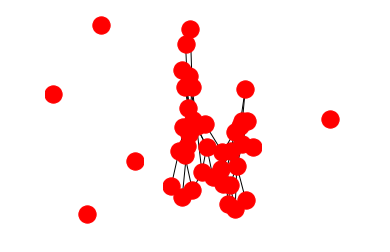

Paso N° 22
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 7   0


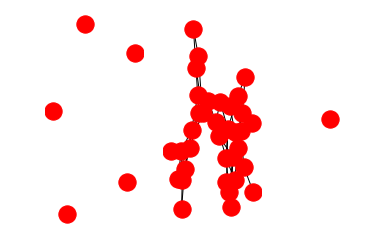

Paso N° 23
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 7   0


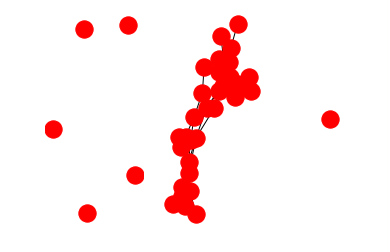

Paso N° 24
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 7   0


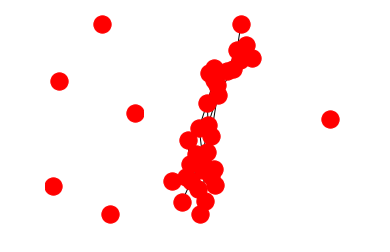

Paso N° 25
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 8   0


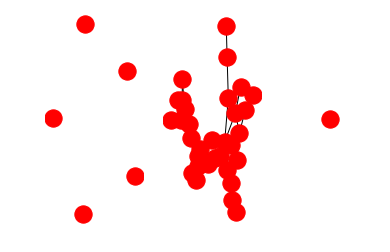

Paso N° 26
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 8   0


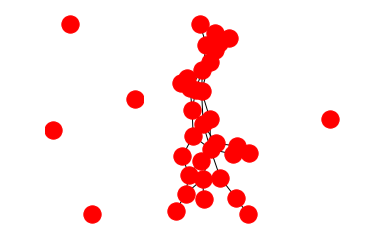

Paso N° 27
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 8   0


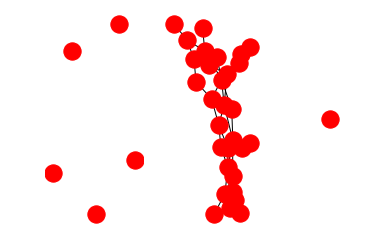

Paso N° 28
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 8   0


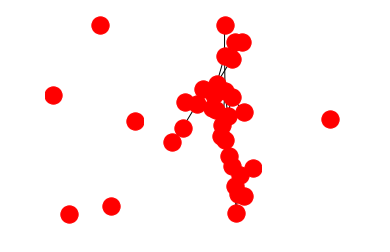

Paso N° 29
Resto   Componente Gigante  Componente NO Gigante
Diámetros = 0   8


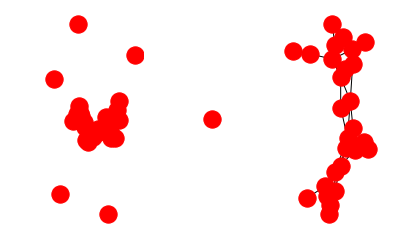

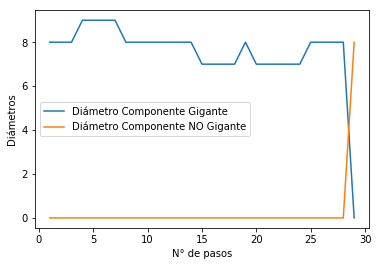

In [16]:
H=G.copy()
Componente_gigante=H.copy()

print("Red total")
print("Diámetro de componente gigante = "+str(nx.diameter(H)))
nx.draw(H)
plt.show()

paso=0
dg=[]
dng=[]
pasos=[]
while len(Componente_gigante)>1:
    paso+=1
    grados_H = [gra for (nom,gra) in H.degree()]
    Grados = np.asarray(grados_H)
    I=H.copy() #copio la red para que el iterable no cambie al remover un nodo
    listanodos = [nom for (nom,gra) in H.degree()]
    H.remove_node(random.choice(listanodos)) #Remuevo nodo random
    largest_cc = max(nx.connected_components(H)) #Miro la componente gigante
    Componente_gigante=H.copy()
    Resto=H.copy()
    #Separo a la red en dos: la componente gigante y el resto
    for line in H.nodes():
        if line in largest_cc: 
            Resto.remove_node(line)
        else:
            Componente_gigante.remove_node(line)
    # Miro la componente gigante del Resto (sería la 2da componente mas grande)        
    if len(Resto)>0:
        largest_cc_2 = max(nx.connected_components(Resto))
        Componente_NO_gigante=Resto.copy()
        for line in Resto.nodes():
            if (line in largest_cc_2)==False: 
                Componente_NO_gigante.remove_node(line)
        diam_NO_gigante=nx.diameter(Componente_NO_gigante)
    else:
        diam_NO_gigante=0
        Componente_NO_gigante=nx.Graph()
    #Miro los diámetros de las dos componentes más grandes y las grafico
    diam_gigante=nx.diameter(Componente_gigante)
    print("Paso N° "+str(paso))
    print('Diámetros = '+str(diam_gigante)+'   '+str(diam_NO_gigante))
    print('Resto   Componente Gigante  Componente NO Gigante')
    plt.subplot(131)
    nx.draw(Resto)
    plt.subplot(132)
    nx.draw(Componente_gigante)
    plt.subplot(133)
    nx.draw(Componente_NO_gigante)
    plt.show()
    dg.append(diam_gigante)
    dng.append(diam_NO_gigante)
    pasos.append(paso)

#Grafico los diámetros en función del N° de paso
plt.plot(pasos,dg,label="Diámetro Componente Gigante")
plt.plot(pasos,dng,label="Diámetro Componente NO Gigante")
plt.legend()
plt.xlabel('N° de pasos')
plt.ylabel('Diámetros')
plt.show()

## Ejercicio 3

### Ítem a: Distribución de grados

Comparamos histogramas en escalas lineal y logarítica, con bineado lineal y logarítmico

In [18]:
# Cargamos los archivos de datos sobre la red de internet
import matplotlib.pylab as plt
import networkx as nx
import numpy as np
import pandas as pd

G = nx.read_gml('as-22july06.gml')

Bineado Lineal


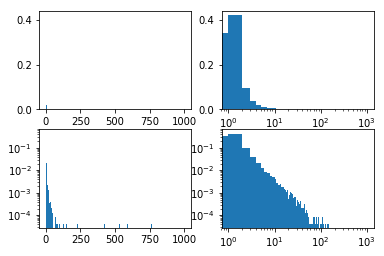

Bineado Logarítmico


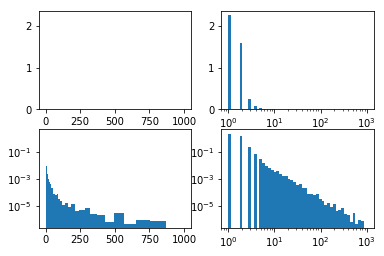

In [25]:
#Armo la tira de grados de los nodos para hacer el histograma
grados_G = [gra for (nom,gra) in G.degree()] # [lo_que_quiero  for los_elementos in iterable]
Datos = np.asarray(grados_G)

# Grafico histogramas con bin lineal en escalas lin-lin, lin-log, log-lin y log-log
b=np.linspace(0,1000,1000)
print("Bineado Lineal")
plt.title("Linear Bins")
plt.subplot(221)
plt.hist(Datos, bins=b, density=True)
plt.subplot(222)
plt.hist(Datos, bins=b, density=True)
plt.xscale('log')
plt.subplot(223)
plt.hist(Datos, bins=b, density=True, log=True) 
#plt.yscale('log')
plt.subplot(224)
plt.hist(Datos, bins=b, density=True, log=True) 
plt.xscale('log')
#plt.yscale('log')
plt.show()

# Grafico histogramas con bin log en escalas lin-lin, lin-log, log-lin y log-log
print("Bineado Logarítmico")
b=np.logspace(0,3,50)
plt.subplot(221)
plt.hist(Datos, bins=b, density=True)
plt.subplot(222)
plt.hist(Datos, bins=b, density=True)
plt.xscale('log')
plt.subplot(223)
plt.hist(Datos, bins=b, density=True, log=True) 
#plt.yscale('log')
plt.subplot(224)
plt.hist(Datos, bins=b, density=True, log=True) 
plt.xscale('log')
#plt.yscale('log')
plt.show()

### La escala log-log con bineado log es la que mejor representa el carácter libre de escala de la red.

### Ítem b: Estimación del exponente

Estimamos el exponente de la distribución usando una función de igraph

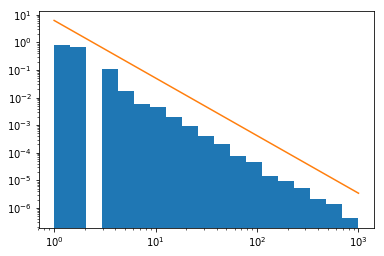

Exponente de la distribución= 2.087156668877868


In [28]:
import igraph as ig
fit=ig.power_law_fit(Datos) #aplicamos la función de ajuste del igraph
gamma=fit.alpha #Este es el exponente de la power law
Kmin=fit.xmin #Este el K_min

b=np.logspace(0,3,20)
p=(gamma-1)/Kmin*(b/Kmin)**(-gamma)

plt.hist(Datos, bins=b, density=True, log=True) 
plt.xscale('log')
plt.plot(b,p)
plt.show()

print('Exponente de la distribución= '+str(gamma))

### Exponente = 2.09>2 => ¡Libre de Escala!
Hay algún problema con la ordenada al origen del ajuste pero la función de igraph en python aún no tiene un manual y no entendemos bien cuál es el problema. Igualmente el exponente debería estar bien.

## Ejercicio 3

### Ítem b
Estimamos el exponente de la distribución usando una función de igraph

## Ejercicio 4

### Ítem a: Conexiones entre nodos

La idea es analizar si los nodos de alto grado tienden a conectarse con los de alto grado o con los de bajo grado.

#### i. Grado de los vecinos

Aquí realizamos la determinación del grado medio de los vecinos para nodos de grado k, primero para la red de colaboraciones científicas y para la red de internet.

##### Para la red de colaboraciones

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


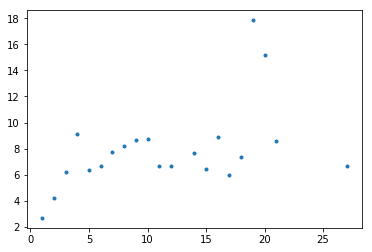

In [6]:
import networkx as nx
import numpy as np
import matplotlib.pylab as plt

H = nx.read_gml('netscience.gml')


B = nx.to_pandas_adjacency(H)

BN = B.values

f = H.degree
grados_H_d = [gra for (nom,gra) in f] # [lo_que_quiero  for los_elementos in iterable]
grados_H = np.asarray(grados_H_d)

b = np.dot(BN,grados_H)

c = b/grados_H

d = [0]*max(grados_H)
e = range(max(grados_H))

for i in e:
    sumo = 0
    cont = 0
    for k in range(len(grados_H)):
        if grados_H[k] == i:
            sumo = sumo+c[k]
            cont = cont+1
    if cont != 0 and sumo != 0:
        d[i] = sumo/cont
        c[i] = cont
    else:
        d[i] = 0
        c[i] = 0
            
# Eliminaremos todos los ceros de los vectores a graficar.
E = []
D = []
C = [] 

for i in e:
    if d[i] != 0:
        D.append(d[i])
        E.append(e[i])  
        C.append(c[i])
            
            #print(d)
#print(e)
    
plt.plot(E,D,'o')
plt.show()

##### Para la red de internet

In [10]:
# Cargamos la red

H1 = nx.read_gml('as-22july06.gml')
B1 = nx.to_pandas_adjacency(H1)
BN1 = B1.values

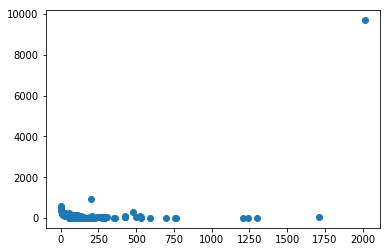

In [14]:
f1 = H1.degree # Asigna un grado distinto a cada uno de los nodos.
grados_H_d1 = [gra for (nom,gra) in f1] # Se queda con el valor del grado para cada uno de los nodos. Genera una tira de grados.
grados_H1 = np.asarray(grados_H_d1) # Es la forma array de todos los grados que hemos calculado en las funciones anteriores.

b1 = np.dot(BN1,grados_H1)

cuent1= np.dot(BN1,np.asarray([1]*len(BN1)))
c1 = b1/cuent1

d1 = [0]*max(grados_H1)
e1 = range(max(grados_H1))

for i in e1:
    sumo = 0
    cont = 0
    for k in range(len(grados_H1)):
        if grados_H1[k] == i:
            sumo = sumo+c1[k]
            cont = cont+1
    if cont != 0 and sumo != 0:
        d1[i] = sumo/cont
        c1[i] = cont
    else:
        d1[i] = 0
        c1[i] = 0

# Eliminamos los elementos con valor nulo para que no molesten a la hora de hacer gráficos y regresiones.

E1 = []
D1 = []
C1 = []

for i in e1:
    if d1[i] != 0:
        D1.append(d1[i])
        E1.append(e1[i])
        C1.append(c1[i])
 
plt.plot(E1,D1,'o')
plt.show()

#### ii. Tendencia

##### Para la red de colaboraciones

La tendencia inicial es creciente, pero después comienza a volverse un poco ruidosa, tal como se puede apreciar a continuación. 

[nan, 2.6840390879478826, 4.18854748603352, 6.239948119325553, 9.098611111111111, 6.3816326530612235, 6.693877551020409, 7.764835164835163, 8.213235294117647, 8.642512077294683, 8.7125, 6.696969696969696, 6.633333333333335, 0, 7.6309523809523805, 6.466666666666668, 8.875, 6.0, 7.333333333333333, 17.84210526315789, 15.175, 8.619047619047619, 0, 0, 0, 0, 0, 6.648148148148148, 0, 0, 0, 0, 0, 0]


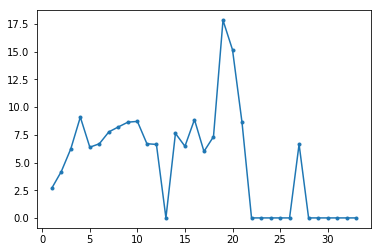

In [15]:
print(d)
    
plt.plot(e,d,'.-')
plt.show()

Esto podría deberse a dos causales: o bien el comportamiento del sistema no puede representarse por medio de una ley de potencias, o bien los promedios en los nodos de mayor orden están basados en muy pocos puntos. Si este fuera el caso, eso explicaría el mayor nivel de ruido. Para corroborarlo, a continuación se grafica la cantidad de puntos que se pomediaron para cada uno de los grados. 

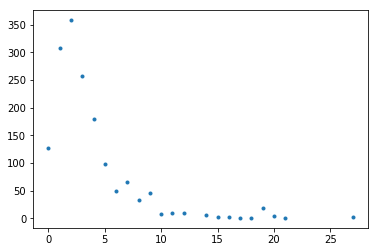

In [16]:
plt.plot(E,C,'.')
plt.show()

Se puede ver claramente que, a partir del grado diez, la cantidad de puntos utilizados para promediar baja de una manera muy notable. Como veremos, no es casual que el ajuste del exponente de un buen resultado hasta los valores de grado diez. Es importante aclarar que esto no descarta la posibilidad de que la ley de potencias no sea aplicable al caso. Simplemente, no hay suficientes puntos para decidir. De todas maneras, la tendencia asortativa de esta red de colaboraciones está de acuerdo con los reportes de la literatura. Específicamente, Newman (capítulo 8), indica que, si bien es frecuente que las correlaciones entre los grados de los nodos no sean fuertes, cuando se producen, es normal que el comportamiento de las redes sociales (como la que estamos trabajando) sea asortativo.

##### Para la red de internet

Observamos que en este caso la tendencia es claramente decreciente, pero con mucho ruido en las regiones intermedias del gráfico. Por tal razón, a continuación realizamos un análisis de la cantidad de puntos promediados en función del grado.

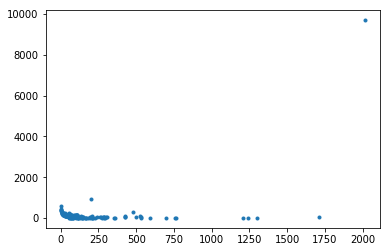

In [17]:
# Graficamos el grado medio de los vecinos en función del grado

plt.plot(E1,D1,'.')
plt.show()

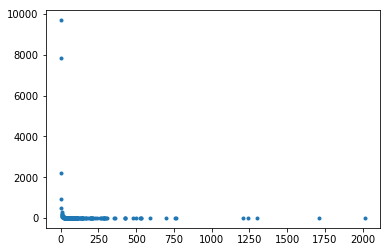

In [18]:
# Graficamos la cantidad de puntos promediados en función del grado.

plt.plot(E1,C1,'.')
plt.show()

En este caso se puede apreciar, nuevamente, que la cantidad de puntos promediados se vuelve muy pequeña en función del grado y a gran velocidad. La cantidad de puntos promediados cae a alrededor de 10 puntos para nodos de grado 40, cuando el rango total de grados es de 1 a aproximadamente 2000. En este caso, los datos sugieren que lo que está ocurriendo es que los puntos son ruidosos debido a la escasez de puntos para promediar. Finalmente, el comportamiento disortativo que exhibe esta red está de acuerdo con lo reportado por Newman, si se toma la red de internet como una red tecnológica.

#### iii. Estimación del exponente

Realizamos una estimación de los exponentes de la distribución del grado de los vecinos en función del grado. Para eso comenzamos con las gráficas de log(knn) vs. log(k).

##### Para la red de colaboraciones

Considerando el análisis de ruido hecho en el ítem anterior, realizaremos la estimación del exponente con los valores para grados entre 1 y 10. 

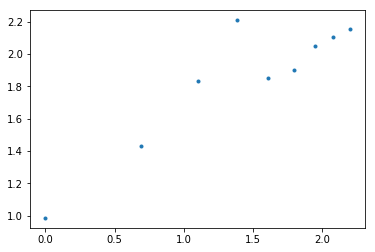

0.4964333264875461


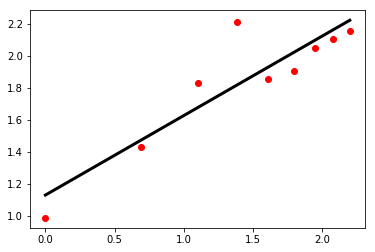

In [19]:
f = np.log(D[1:10])
g = np.log(E[1:10])

plt.plot(g,f,'.')
plt.show()

from scipy import optimize
%matplotlib inline

fitfunc = lambda p, g: p[0]*g+p[1]# Funcion con la que queremos fitear la data
p0 = [1, 1] # Parametros iniciales para fitear

errfunc = lambda p, g, f: fitfunc(p, g) - f # Distancia a la función objetivo
p1, success = optimize.leastsq(errfunc, p0[:], args=(g, f))
plt.plot(g, f, "ro", g, fitfunc(p1, g), "k-", linewidth=3) # Plot of the data and 

print(p1[0])

Se obtiene un coeficiente mu = 0,5061. Esto es un nivel de correlación intermedio. A continuación graficamos esta recta en el contexto de todos los puntos, incluyendo los que no se tomaron en cuenta para el ajuste.

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


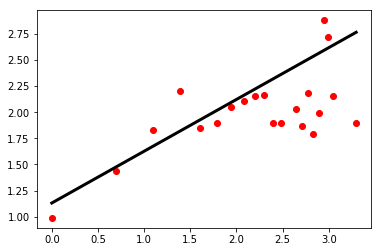

In [21]:
r = np.log(D)
s = np.log(E)

plt.plot(s, r, "ro", s, fitfunc(p1, s), "k-", linewidth=3) # Plot of the data and 
plt.show()

Los puntos no considerados se apartan considerablemente de la recta de ajuste, pero consideramos que son el resultado de promediar muy pocos nodos, pero el rango de grados y valores es demasiado pequeño como para que valga la pena intentar un bineado logarítmico.

##### Para la red de internet

Repetiremos el mismo procedimiento para la red de internet. Esta vez incluiremos todos los puntos en el ajuste, con excepción del primero, que se aparta considerablemente. Sin embargo, no hay una manera razonable de quitar los puntos ruidosos de la zona media de la nube de puntos.

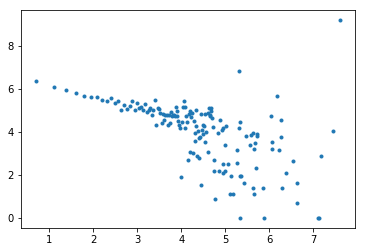

[-0.67279224  6.96187116]


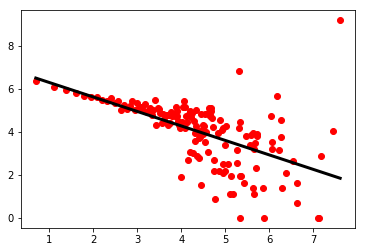

In [22]:
f1 = np.log(D1[1:len(D1)])
g1 = np.log(E1[1:len(E1)])

plt.plot(g1,f1,'.')
plt.show()

from scipy import optimize
%matplotlib inline

fitfunc = lambda p1, g1: p1[0]*g1+p1[1]# Funcion con la que queremos fitear la data
p01 = [1, 1] # Parametros iniciales para fitear

errfunc = lambda p1, g1, f1: fitfunc(p1, g1) - f1 # Distancia a la función objetivo
p11, success = optimize.leastsq(errfunc, p01[:], args=(g1, f1))
plt.plot(g1, f1, "ro", g1, fitfunc(p11, g1), "k-", linewidth=3) # Plot of the data and 

print(p11)

Se obtiene un coeficiente mu = -0,4388. Nuevamente, la correlación es moderada, pero en sentido inverso. 

#### iv. Asortatividad de la red

Para el cálculo de las asortatividades de las redes se utilizó el coeficiente de correlación propuesto en el libro de Newman, el cual se calcula por tramos para evitar problemas con el tiempo de corrida.

##### Para la red de colaboraciones

In [23]:
# Aquí hacemos el cálculo de los valores de los coeficientes y calculamos el coeficiente de correlaciónn.

Se=0
S1=0
S2=0
S3=0

for i in range(len(BN)):
    for j in range(len(BN)):
        Se = Se+BN[i,j]*grados_H[i]*grados_H[j]
    S1=S1+grados_H[i]
    S2=S2+grados_H[i]*grados_H[i]
    S3=S3+grados_H[i]*grados_H[i]*grados_H[i]

r = (Se*S1 - S2*S2)
y = (S1*S3 - S2*S2)

print(r/y)

0.4616224667525835


C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in long_scalars
  app.launch_new_instance()


Se obtiene un coeficiente de 0.46, que es muy cercano al coeficiente obtenido a partir del ajuste por medio de una ley de potencias. Esto se debe a que, en definitiva, tanto el coeficiente de Newman como el ajuste por medio de una ley de potencias están midiendo el mismo concepto, pero de una manera diferente. Mientras uno de los coeficientes es un exponente, el coeficiente de correlación es una constante multiplicativa.

##### Para la red de internet

In [25]:
S1e=0
S11=0
S12=0
S13=0

for i in range(len(grados_H1)):
    for j in range(len(grados_H1)):
        S1e = S1e+BN1[i,j]*grados_H1[i]*grados_H1[j]
    S11=S11+grados_H1[i]
    S12=S12+grados_H1[i]*grados_H1[i]
    S13=S13+grados_H1[i]*grados_H1[i]*grados_H1[i]

r1 = (S1e*S11 - S12*S12)
y1 = (S11*S13 - S12*S12)
print(r1/y1)

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


KeyboardInterrupt: 

Acá estamos teniendo algún tipo de problema con el algoritmo de cálculo porque la red es muy grande.

### b. Aplicación a levaduras

La aplicación de los primeros tres puntos del ítem anterior a las levaduras es directa a través de una función que haga todos estos cálculos.

In [33]:
# Definimos la función para calcular la asortatividad de una red.
import pandas as pd

def asortatividad(H):

    B = nx.to_pandas_adjacency(H)
    BN = B.values
    f = H.degree # Asigna un grado distinto a cada uno de los nodos.
    grados_H_d = [gra for (nom,gra) in f] # Se queda con el valor del grado para cada uno de los nodos. Genera una tira de grados.
    grados_H = np.asarray(grados_H_d) # Es la forma array de todos los grados que hemos calculado en las funciones anteriores.

    b = np.dot(BN,grados_H)

    cuent= np.dot(BN,np.asarray([1]*len(BN)))
    c = b/cuent

    d = [0]*max(grados_H)
    e = range(max(grados_H))

    for i in e:
        sumo = 0
        cont = 0
        for k in range(len(grados_H)):
            if grados_H[k] == i:
                sumo = sumo+c[k]
                cont = cont+1
        if cont != 0 and sumo != 0:
            d[i] = sumo/cont
        else:
            d[i] = 1
    f = np.log(d[1:11])
    g = np.log(e[1:11])       
    fitfunc = lambda p, g: p[0]*g+p[1]# Funcion con la que queremos fitear la data
    p0 = [1, 1] # Parametros iniciales para fitear
    errfunc = lambda p, g, f: fitfunc(p, g) - f # Distancia a la función objetivo
    p1, success = optimize.leastsq(errfunc, p0[:], args=(g, f))
    plt.plot(g, f, "ro", g, fitfunc(p1, g), "k-", linewidth=3) # Plot of the data and 
    return p1[0]

In [34]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

a = ldata('yeast_AP-MS.txt')
A = nx.Graph()
A.add_edges_from(a)
a_as=asortatividad(a)
print(a_as)


TypeError: unhashable type: 'list'

0.1936024915375415


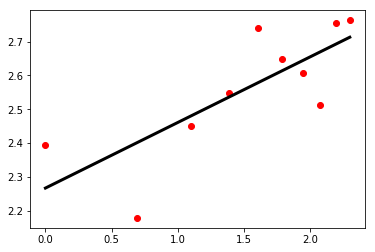

In [35]:
b = ldata("yeast_Y2H.txt")
B = nx.Graph()
B.add_edges_from(b)
b_as=asortatividad(B)
print(b_as)

Los cálculos de asortatividad muestran que las relaciones entre proteínas generadas por el método Y2H configuran una red con baja correlación. Es decir, con bajo nivel de asortatividad. De hecho, se puede ver que el ajuste realizado no es realmente preciso, ya que la nube de puntos ni siquiera muestra la correlación suficiente como para considerar apropiado un ajuste lineal. Por otra parte, la red AP-MS sí muestra un grado mayor de asortatividad. Dado que son las mismas proteínas, se puede pensar que el origen de la discrepancia está en el método de construcción de la red. Para el caso de AP-MS se están conjeturando muchas relaciones al interior de cada conjunto de proteínas. En consecuencia, es probable que el método específico que permite crear esos vínculos conjeturales esté añadiendo a la red, una asortatividad que esta no tiene como tal.